<a href="https://colab.research.google.com/github/Jack3690/Kugelblitz/blob/main/Bar_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialization**

In [1]:
!git clone https://github.com/Jack3690/Kugelblitz

Cloning into 'Kugelblitz'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 47 (delta 10), reused 37 (delta 4), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [2]:
cd Kugelblitz/

/content/Kugelblitz


## **SDSS-Marvin**

## **Fast.ai**

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 186 kB 38.2 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 1.2 MB 34.6 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 306 kB/s 
Mounted at /content/gdrive


In [4]:
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

In [5]:
path=Path('/content/gdrive/My Drive')
path.exists()

True

In [6]:
!pip install sdss-marvin --quiet

     |████████████████████████████████| 393 kB 5.3 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 284 kB 38.9 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 596 kB 38.9 MB/s 
     |████████████████████████████████| 525 kB 46.2 MB/s 
     |████████████████████████████████| 169 kB 35.1 MB/s 
     |████████████████████████████████| 100 kB 8.6 MB/s 
     |████████████████████████████████| 41 kB 319 kB/s 
     |████████████████████████████████| 212 kB 41.9 MB/s 
     |████████████████████████████████| 548 kB 48.4 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 111 kB 47.8 MB/s 
     |████████████████████████████████| 47 kB 4.4 MB/s 
     |██████████████████████████

### **Configuring Marvin**

In [7]:
!cp -a sas/ /root/

!cp -a sas/map.py /usr/local/lib/python3.7/dist-packages/marvin/utils/plot/

!mkdir  /root/sas/dr16
!cp -a /root/sas/mangawork/manga/ /root/sas/dr16

In [8]:
import os
import sys
import requests
import warnings
import PIL
import copy

from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sb
import matplotlib
import numpy as np
from matplotlib import gridspec
import pandas as pd
import marvin.utils.plot.colorbar as colorbar
from matplotlib.colors import ListedColormap
from IPython.display import clear_output

from marvin.tools.maps import Maps
import marvin.utils.plot.map as mapplot
from astropy.table import Table
import astropy.units as u
from astropy.io import ascii
from astropy.wcs import WCS
from astropy.coordinates import Distance
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import Planck15
from astropy.io import fits
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
if sys.version_info.major == 2:
    from cStringIO import StringIO as stringio
else:
    from io import StringIO as stringio
    from io import BytesIO as bytesio

matplotlib.rcParams['figure.figsize']=(10,10)
matplotlib.rcParams['font.size']=15

#sb.set_style('dark')

AttributeError: ignored

# **Data & Image acquisition**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

**Table with MaNGA Galaxies**

In [ ]:
df=pd.read_csv('data/mangaifu.csv')
df=df[df.ifudesignsize>0][["plateifu","mangaid","objra","objdec"]]
df

,plateifu,mangaid,objra,objdec
0,8935-12701,1-404249,194.523424,29.017353
1,7977-12701,1-114955,332.602090,11.713077
2,9494-12701,1-412866,126.910630,21.256855
3,8150-12701,1-389685,146.701430,31.719579
4,9487-12701,1-44618,122.522873,46.193025
...,...,...,...,...
4819,8155-9102,1-202101,53.686515,-1.245784
4820,9042-9102,1-549071,235.032077,28.152265
4821,9870-9102,1-199224,233.165629,43.057807
4822,8719-9102,1-44693,121.744779,46.562969


In [ ]:
if not os.path.exists(path/'mangaifu/'):
  os.mkdir(path/'mangaifu/')
count = 0
not_found = []
for plateifu in df.plateifu[:100]:
  count+=1
  if not os.path.exists(path/f'mangaifu/{plateifu}.png'):
    try:
      maps = Maps(plateifu=plateifu,mode='remote')

      sdss_cutout = maps.getImage()
      scale = sdss_cutout.wcs.to_header()['PC2_2']*3600
      size = 2*sdss_cutout.wcs.to_header()['CRPIX1']*scale
      sdss_cutout.get_new_cutout(size,size,scale=size/512)

      sdss_cutout.save(path/f'mangaifu/{plateifu}.png')
    except:
      print(f"\nError for plateifu : {plateifu}")
      not_found.append(plateifu)
  if count%10==0:
    print('.',end='')
  if count%1000==0:
    print(count)
  plt.pause(0.5)

[WARNING]: Specified hdu=MANGA not found, reading in first available table (hdu=1) instead. This will result in an error in future versions! (AstropyDeprecationWarning)



Error for plateifu : 8480-12701
..........

In [ ]:
len(os.listdir(path/'mangaifu'))

99

# **Caffe Classifier (Sheelu et.al)**

https://doi.org/10.1093/mnras/sty627

In [ ]:
!git clone https://github.com/vadimkantorov/caffemodel2pytorch

Cloning into 'caffemodel2pytorch'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 294 (delta 1), reused 0 (delta 0), pack-reused 287
Receiving objects: 100% (294/294), 81.26 KiB | 2.08 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [ ]:
import caffemodel2pytorch.caffemodel2pytorch as caffemodel2pytorch

In [ ]:
model = caffemodel2pytorch.Net(
	prototxt = path/'bar_model/deploy.prototxt',
	weights = path/'bar_model/snapshot_iter_471780.caffemodel',
	caffe_proto = 'https://raw.githubusercontent.com/BVLC/caffe/master/src/caffe/proto/caffe.proto'
);

caffemodel2pytorch: loading model from [/content/gdrive/My Drive/bar_model/snapshot_iter_471780.caffemodel] in HDF5 format failed [Unable to open file (file signature not found)], falling back to caffemodel format
caffemodel2pytorch: loaded model from [/content/gdrive/My Drive/bar_model/snapshot_iter_471780.caffemodel] in caffemodel format


In [ ]:
image_path=get_image_files(path/'mangaifu')

In [ ]:
image_path

(#99) [Path('/content/gdrive/My Drive/mangaifu/8935-12701.png'),Path('/content/gdrive/My Drive/mangaifu/7977-12701.png'),Path('/content/gdrive/My Drive/mangaifu/9494-12701.png'),Path('/content/gdrive/My Drive/mangaifu/8150-12701.png'),Path('/content/gdrive/My Drive/mangaifu/9487-12701.png'),Path('/content/gdrive/My Drive/mangaifu/8335-12701.png'),Path('/content/gdrive/My Drive/mangaifu/8554-12701.png'),Path('/content/gdrive/My Drive/mangaifu/8485-12701.png'),Path('/content/gdrive/My Drive/mangaifu/8134-12701.png'),Path('/content/gdrive/My Drive/mangaifu/8154-12701.png')...]

In [ ]:
from torchvision import transforms
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
tfms = transforms.Compose([
 transforms.Resize(256),
 transforms.ToTensor(),
])

In [ ]:
# Dict object to store data
barclass= {
    'barred' : [],
    'unbarred': [],
}

count=0

for path_img in image_path:
  # Loading image from file
  model.cuda()
  model.eval() 
  img=Image.open(path_img)
  data = tfms(img)
  data = data.permute(0,2,1).unsqueeze(0)
  if torch.cuda.is_available():
    data=data.cuda()
  
  # Clasifying using Caffe model
  out= model(data = data)

  # Using output probabilities to find class
  if ( (out['softmax'][0][0].item() > out['softmax'][0][1].item()) and (out['softmax'][0][0].item() > 0.5) ):
    ch='barred'
    prob=out['softmax'][0][0].item() 
  elif ( (out['softmax'][0][0].item() < out['softmax'][0][1].item()) and (out['softmax'][0][1].item() > 0.5) ):
    ch='unbarred'
    prob = out['softmax'][0][1].item()

  # Appending data to dict
  barclass[ch].append([path_img.name[:-4],prob])
  count+=1

  print(".",end="")
  if count%100==0:
    print(count)
print(count)

...................................................................................................99


In [ ]:
bar=pd.DataFrame(barclass['barred'],columns=['plateifu','prob'])
nobar=pd.DataFrame(barclass['unbarred'],columns=['plateifu','prob'])

In [ ]:
bar.to_csv(path/'manga_caffe_bar.csv')
nobar.to_csv(path/'manga_caffe_unbarred.csv')

In [ ]:
print("Number of barred galaxies :",bar.count()[0])
print("Number of unbarred galaxies :",nobar.count()[0])
print("Total :",bar.count()[0]+nobar.count()[0])

Number of barred galaxies : 0
Number of unbarred galaxies : 99
Total : 99


# **ResNet152 Classifier (Fast.ai)**
Work in progess

## **Data**

In [9]:
!mkdir /root/.kaggle

In [10]:
cp -a data/kaggle.json /root/.kaggle/

In [11]:
!chmod 600 /root/.kaggle/kaggle.json

In [12]:
import kaggle
import zipfile
import pandas as pd

In [13]:
!kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

 99% 1.00G/1.01G [00:06<00:00, 152MB/s]
100% 1.01G/1.01G [00:06<00:00, 156MB/s]
  0% 0.00/265k [00:00<?, ?B/s]
100% 265k/265k [00:00<00:00, 86.7MB/s]
100% 788M/792M [00:06<00:00, 42.2MB/s]
100% 792M/792M [00:06<00:00, 129MB/s] 
  0% 0.00/520k [00:00<?, ?B/s]
100% 520k/520k [00:00<00:00, 150MB/s]
100% 265k/265k [00:01<00:00, 203kB/s]

  0% 0.00/4.63M [00:00<?, ?B/s]
100% 4.63M/4.63M [00:00<00:00, 42.5MB/s]


In [14]:
with zipfile.ZipFile('images_training_rev1.zip','r') as f:
  f.extractall()
with zipfile.ZipFile('training_solutions_rev1.zip','r') as f:
  f.extractall()

In [15]:
len(os.listdir('images_training_rev1'))

61578

In [16]:
df_labels = pd.read_csv('training_solutions_rev1.csv')
df_labels

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027226,0.000000,0.027226,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,0.260804,0.000000,0.126152,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000,0.059207,0.0,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,0.045378,0.053406,0.000000,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,0.257128,0.347328,0.055958,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000,0.116962,0.0,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,0.000000,0.227114,0.545764,0.090673,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000,0.045450,0.0,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [29]:
df_bar = df_labels[ (df_labels['Class2.2']>0.6) & (df_labels['Class3.1']>0.6) & (df_labels['Class8.6']<0.5)]
len(df_bar)

2221

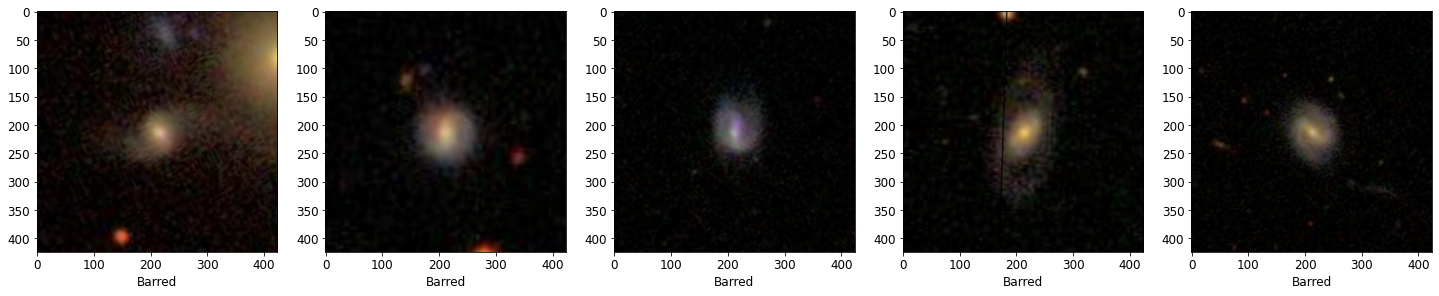

In [28]:
# Plotting sample images using df_spiral from images_training_rev1/
fig,ax = plt.subplots(1,5, figsize = (25,5))
c = 0
for i in df_bar['GalaxyID'][:5]:
  img = plt.imread(f'images_training_rev1/{i}.jpg')
  ax[c].imshow(img)
  ax[c].set_xlabel('Barred')
  c+=1

In [94]:
df_nobar = df_labels[(df_labels['Class3.2']>0.8) & (df_labels['Class8.6']<0.5)]
df_edge_on = df_labels[(df_labels['Class2.1']>0.8) & (df_labels['Class8.6']<0.2)]
df_nobar = df_nobar.append(df_edge_on)
len(df_nobar)

4482

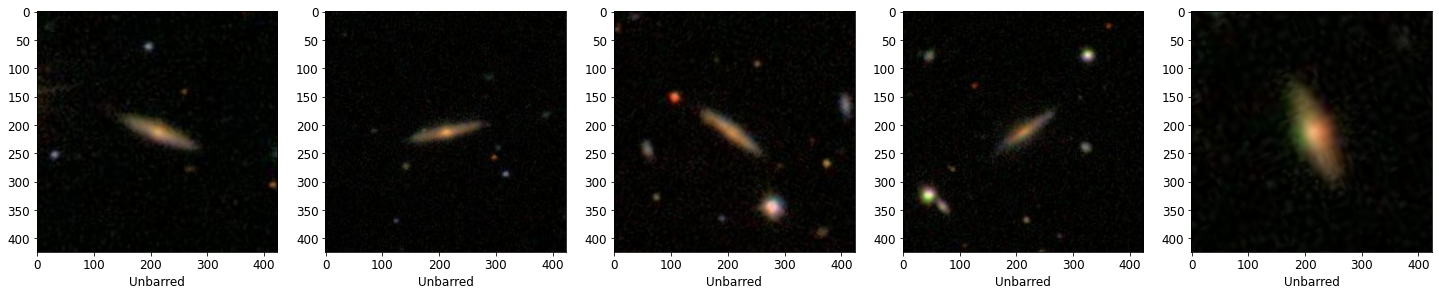

In [95]:
# Plotting sample images using df_elliptical from images_training_rev1/
fig,ax = plt.subplots(1,5, figsize = (25,5))
c = 0
for i in df_edge_on['GalaxyID'][:5]:
  img = plt.imread(f'images_training_rev1/{i}.jpg')
  ax[c].imshow(img)
  ax[c].set_xlabel('Unbarred')
  c+=1

In [32]:
# Directory containing images based on class
!mkdir morph
!mkdir morph/barred
!mkdir morph/unbarred

In [33]:
# Copying images from images_training_rev1/ to morph/barred/ using df_bar
for i in df_bar['GalaxyID']:
  os.system(f'cp images_training_rev1/{i}.jpg  morph/barred/')

In [34]:
# Copying images from images_training_rev1/ to morph/unbarred/ using df_nobar
for i in df_nobar['GalaxyID']:
  os.system(f'cp images_training_rev1/{i}.jpg  morph/unbarred/')

In [35]:
# Checking number of sources in the directories 'morph/spiral' and 'morph/elliptical'
len(os.listdir('morph/barred')), len(os.listdir('morph/unbarred'))

(2221, 2756)

In [36]:
# Setting path_out to 'morph/'
path_out = Path('morph/')
path_out.exists()

True

## **Model**

In [37]:
# Creating image block and splitting data into training and validation set. 80% training and 20% validation
galaxy = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y = parent_label,item_tfms=Resize(224))

In [38]:
# Loading Data
dls = galaxy.dataloaders(path_out)

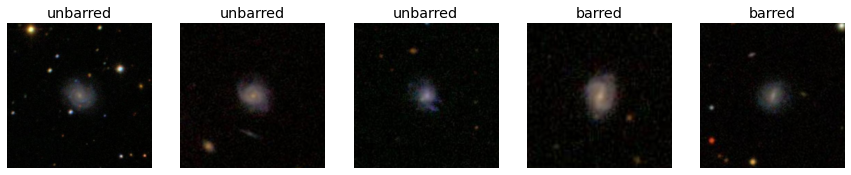

In [39]:
# Showing validation set
dls.valid.show_batch(max_n=5, nrows=1)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,1.094942,0.683049,0.650251,01:34
1,0.826502,0.573813,0.766834,01:34
2,0.519620,0.437988,0.831156,01:34
3,0.312190,0.379572,0.858291,01:34
4,0.167704,0.398392,0.889447,01:34
5,0.102049,0.367036,0.888442,01:34
6,0.054694,0.370738,0.896482,01:34
7,0.031986,0.406355,0.891457,01:34
8,0.025584,0.402096,0.896482,01:34
9,0.021875,0.395799,0.902513,01:34


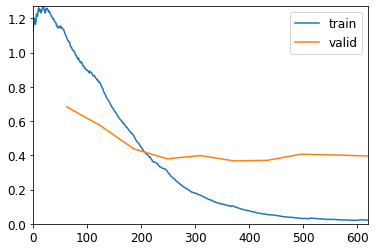

In [40]:
# Learner with resnet50 architecure with pretrained=True,cbs=ShowGraphCallback,metrics=accuracy
learn = cnn_learner(dls,densenet121,pretrained=True, cbs=ShowGraphCallback,metrics=accuracy)
# Fit using fit_one_cycle with 10 iterations
learn.fit_one_cycle(10)

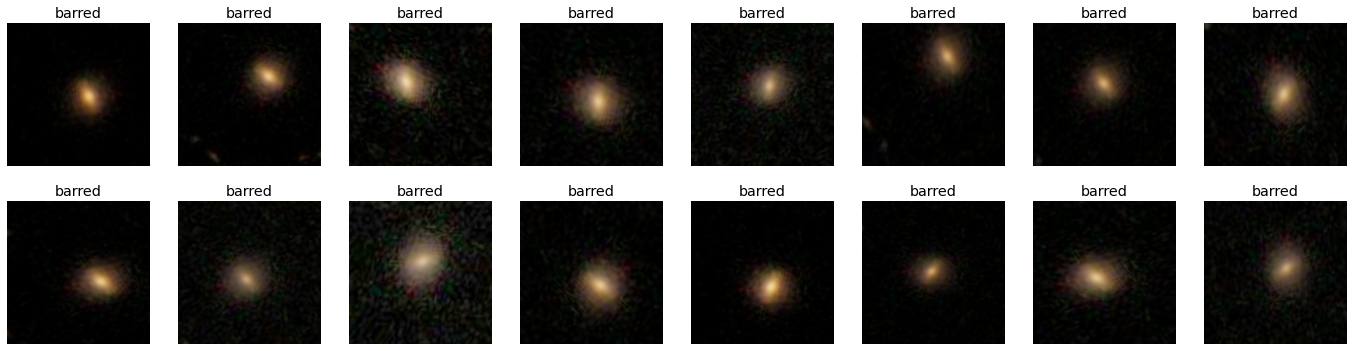

In [41]:

# Using Data Augmentation and plotting the sample of training batch. Use the settings below for all data augmentation in this module
galaxy = galaxy.new(batch_tfms=aug_transforms(mult=1.5, flip_vert=True,max_rotate = 360.,max_warp=0),item_tfms=RandomResizedCrop(224, min_scale=0.5))
dls = galaxy.dataloaders(path_out)
dls.train.show_batch(max_n=16, nrows=2, unique=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.019902,0.404546,0.895477,01:34
1,0.047660,0.560007,0.880402,01:34
2,0.132823,0.372309,0.895477,01:33
3,0.101378,0.343458,0.896482,01:34
4,0.063772,0.386629,0.898492,01:33
5,0.033189,0.395041,0.910553,01:34
6,0.022939,0.399657,0.917588,01:34
7,0.013897,0.373280,0.920603,01:33
8,0.008737,0.379866,0.917588,01:34
9,0.006244,0.381822,0.921608,01:34


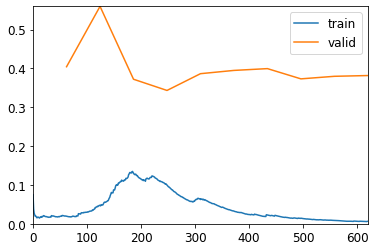

In [42]:
# Fit using fit_one_cycle with 1 iterations
learn.fit_one_cycle(10)

In [74]:
cd Kugelblitz

/content/Kugelblitz


In [52]:
learn.export('export.pkl')

In [53]:
learn2 = load_learner('export.pkl')

In [54]:
learn2.dls.vocab

['barred', 'unbarred']

In [ ]:
(path/'WHAN/').exists()

True

In [55]:
image_path=get_image_files(path/'mangaifu/')

In [56]:
len(image_path)

99

In [57]:
# Dict object to store data
barclass= {
    'barred' : [],
    'unbarred': [],
}
count=0
for img in image_path:
  # Loading and classifying image
  c,i,p=learn.predict(img)
  # Appening data to dict 
  barclass[c].append([img.name[:-4],p[i].numpy().item()])
  count+=1
  if count%100==0:
    print(count)
    break
print(count)

99


In [58]:
bar=pd.DataFrame(barclass['barred'],columns=['plateifu','prob'])
nobar=pd.DataFrame(barclass['unbarred'],columns=['plateifu','prob'])

In [ ]:
bar.to_csv(path/'manga_bar.csv')
nobar.to_csv(path/'manga_unbarred.csv')

In [59]:
print("Number of barred galaxies :",bar.count()[0])
print("Number of unbarred galaxies :",nobar.count()[0])
print("Total :",bar.count()[0]+nobar.count()[0])

Number of barred galaxies : 60
Number of unbarred galaxies : 39
Total : 99


In [60]:
bar

,plateifu,prob
0,7977-12701,0.990063
1,8150-12701,0.999989
2,9487-12701,0.973442
3,8134-12701,0.984812
4,8154-12701,0.931101
5,8552-12701,0.971974
6,8083-12701,0.989921
7,9047-12701,0.538765
8,8250-12701,0.994585
9,9492-12701,0.891649
